In [3]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

In [4]:
FOLDER = 'imagens_celulas_1000/'
# FOLDER = 'cell_images/'
positivas = os.listdir(FOLDER + 'positivos/')
negativas = os.listdir(FOLDER + 'negativos/')


In [5]:
dataset = list()

SIZE = 64
label = list()

print('reading positives')
for i, image_name in enumerate(positivas):
  if (image_name.split('.')[1]== 'png'):
    image = cv2.imread(FOLDER + 'positivos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

print('reading negatives')
for i, image_name in enumerate(negativas):
  if (image_name.split('.')[1]== 'png'):
    image = cv2.imread(FOLDER + 'negativos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)

reading positives
reading negatives


label =  1
imagem


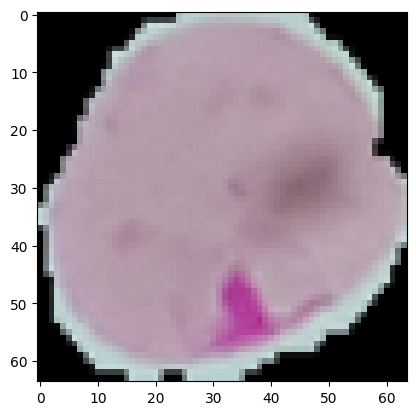

In [6]:
import matplotlib.pyplot as plt
index = 10
print('label = ', label[index])
print('imagem')
plt.imshow(dataset[index])

In [7]:
X = np.array(dataset)
X = X/255

print(np.shape(X))

y = tf.keras.utils.to_categorical(np.array(label))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
print(np.shape(X_train))
print(np.shape(y_train))

(2000, 64, 64, 3)
(1800, 64, 64, 3)
(1800, 2)


In [18]:
TAM = (SIZE, SIZE, 3)
inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(inp)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)


conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(drop1)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)

drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)


conv3 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(drop2)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv3)

drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)


conv4 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', dilation_rate=2)(drop3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv4)

drop4= tf.keras.layers.Dropout(rate = 0.2)(pool4)


flat = tf.keras.layers.Flatten()(drop4)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop5)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation = 'sigmoid')(drop5)

model = tf.keras.Model(inputs = inp, outputs = out)

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                      

In [19]:
history = model.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 30, validation_split = 0.1)

Epoch 1/30
26/26 [==============================] - 4s 109ms/step - loss: 0.6959 - accuracy: 0.5068 - val_loss: 0.6919 - val_accuracy: 0.5722
Epoch 2/30
26/26 [==============================] - 3s 105ms/step - loss: 0.6928 - accuracy: 0.5185 - val_loss: 0.6904 - val_accuracy: 0.7833
Epoch 3/30
26/26 [==============================] - 3s 104ms/step - loss: 0.6898 - accuracy: 0.5315 - val_loss: 0.6860 - val_accuracy: 0.5722
Epoch 4/30
26/26 [==============================] - 3s 104ms/step - loss: 0.6504 - accuracy: 0.6451 - val_loss: 0.6282 - val_accuracy: 0.7167
Epoch 5/30
26/26 [==============================] - 3s 101ms/step - loss: 0.6064 - accuracy: 0.6722 - val_loss: 0.6111 - val_accuracy: 0.6444
Epoch 6/30
26/26 [==============================] - 3s 102ms/step - loss: 0.6233 - accuracy: 0.6488 - val_loss: 0.6019 - val_accuracy: 0.7222
Epoch 7/30
26/26 [==============================] - 3s 104ms/step - loss: 0.5844 - accuracy: 0.6938 - val_loss: 0.5795 - val_accuracy: 0.7444
Epoch 

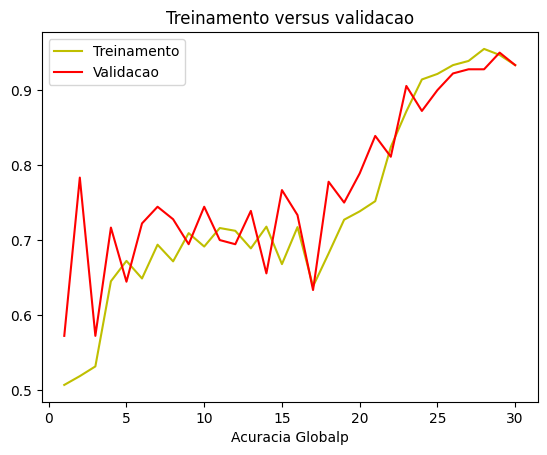

In [20]:
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validacao")

plt.title("Treinamento versus validacao")
plt.xlabel("epocas")
plt.xlabel("Acuracia Globalp")
plt.legend()
plt.show()

In [21]:
MODEL_NAME='malaria_model.h5'
model.save(MODEL_NAME)


/home/teixeira/.pyenv/versions/3.11.5/envs/opencv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from tensorflow.keras.models import load_model

model = load_model(MODEL_NAME)

_, score = model.evaluate(X_test, y_test)

# accuracy: 0.9650
print(score)


7/7 [==============================] - 0s 11ms/step - loss: 0.1451 - accuracy: 0.9650
0.9649999737739563
